### Run models on the data, reflecting hate vs not-hate (than the multiclass problem)

In [1]:
import cPickle as pickle
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
# from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from scipy import interp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
df = pickle.load(open('../Data/labeled_hate_nothate.p', 'rb'))

In [63]:
X = df.body
y = df.label
y.value_counts()

NotHate    1012591
Hate        565494
Name: label, dtype: int64

In [64]:
# Binarize the output
# do I have the right classes? --> should match automatically.
y = label_binarize(y, classes=['NotHate', 'Hate'])
n_classes = y.shape[1]

In [65]:
classes=['Hate', 'NotHate']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
# Count Vectorizer

countv = CountVectorizer(decode_error = 'ignore', stop_words = 'english')
#Training vector
countv_fit_X_train = countv.fit_transform(X_train)
#test vector
countv_fit_X_test = countv.transform(X_test)

In [53]:
y_test

array([[1],
       [1],
       [1],
       ..., 
       [1],
       [1],
       [0]])

In [68]:
y_train = np.reshape(y_train, (y_train.shape[0],))

In [69]:
MNB = MultinomialNB()
model = MNB.fit(countv_fit_X_train, y_train)
y_score = model.predict_proba(countv_fit_X_test)

<IPython.core.display.Javascript object>


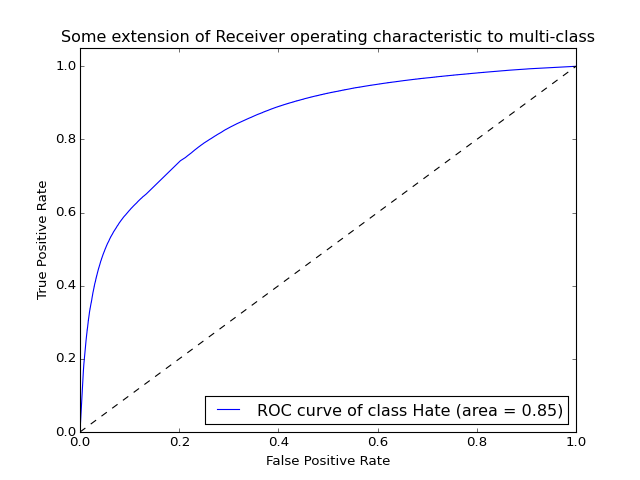

In [72]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i], pos_label=0)
    roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area

# Plot all ROC curves
plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          linewidth=2)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          linewidth=2)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

array([0, 1, 0, ..., 1, 1, 0])

In [71]:
print(classification_report(y_test, model.predict(countv_fit_X_test)))

             precision    recall  f1-score   support

          0       0.84      0.82      0.83    304440
          1       0.68      0.72      0.70    168986

avg / total       0.78      0.78      0.78    473426

